In [8]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil = 
#   Dataset yang digunakan adalah SMS Spam Detection Dataset dari Kaggle. 
#   Tujuan dari dataset ini adalah untuk mendeteksi apakah sebuah pesan SMS termasuk spam atau bukan (ham).
# 2. Penjelasan setiap kolomnya = 
#   label	        - Label pesan, berisi kategori pesan: ham (bukan spam) atau spam.
#   text          - Isi pesan SMS itu sendiri, berupa teks yang akan dianalisis
#   text_length   - Kolom tambahan yang berisi jumlah karakter tiap pesan (untuk analisis panjang pesan).

# 3. Import library
# 4. Load data

# Penjelasan Dataset yang digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [9]:
df = pd.read_csv("spam_sms.csv")

df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [10]:

df = pd.read_csv('spam_sms.csv', encoding='latin-1')

# Mengganti nama kolom
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

# Pilih kolom yang relevan
df = df[['label', 'text']]

# Tampilkan baris
print(df.head(10))


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


Data Understanding

In [11]:

print("Jumlah baris data:", df.shape[0])
print("Jumlah kolom data:", df.shape[1])


Jumlah baris data: 5572
Jumlah kolom data: 2


In [12]:
# Tambahkan kolom baru: panjang tiap pesan (jumlah karakter)
df['text_length'] = df['text'].apply(len)

# Hitung rata-rata panjang pesan
print("Panjang rata-rata setiap baris:", df['text_length'].mean())


Panjang rata-rata setiap baris: 80.33309404163676


In [13]:
#CEK DATA DUPLIKAT
# Menghitung jumlah data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

# Menghapus data duplikat jika ada
df = df.drop_duplicates()
print("Setelah dihapus duplikat, jumlah data:", df.shape[0])


Jumlah data duplikat: 403
Setelah dihapus duplikat, jumlah data: 5169


In [14]:
# CEK DATA KOSONG 
print("Cek data kosong:\n", df.isnull().sum())


Cek data kosong:
 label          0
text           0
text_length    0
dtype: int64


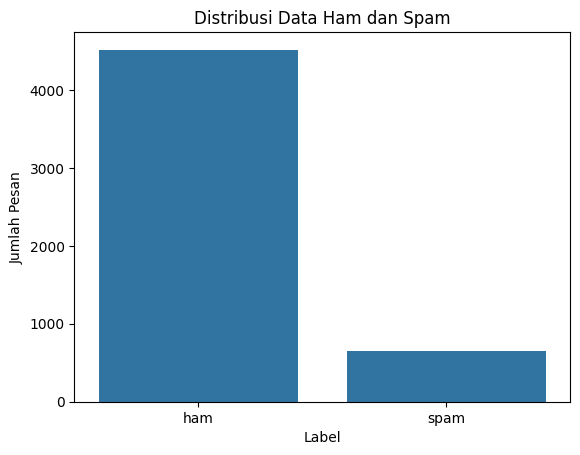

In [15]:
#BAR CHART
sns.countplot(x='label', data=df)
plt.title('Distribusi Data Ham dan Spam')
plt.xlabel('Label')
plt.ylabel('Jumlah Pesan')
plt.show()

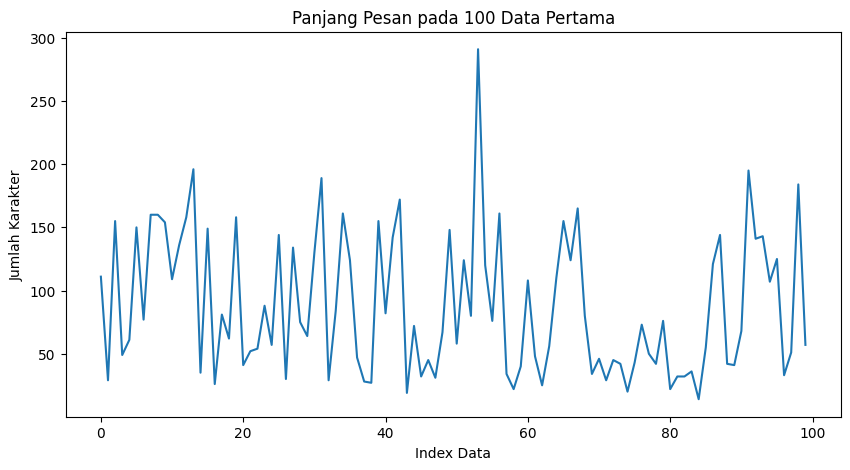

In [16]:
#LINE CHART
plt.figure(figsize=(10,5))
plt.plot(df['text_length'].head(100))
plt.title('Panjang Pesan pada 100 Data Pertama')
plt.xlabel('Index Data')
plt.ylabel('Jumlah Karakter')
plt.show()


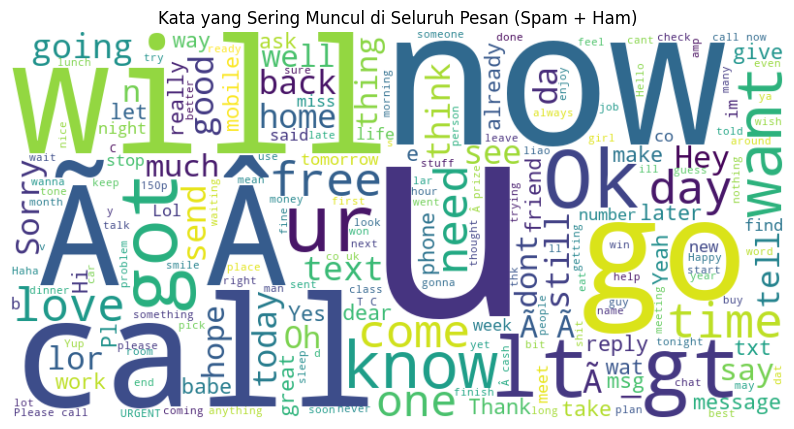

In [17]:
all_words = ' '.join(df['text'])
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('Kata yang Sering Muncul di Seluruh Pesan (Spam + Ham)')
plt.axis('off')
plt.show()

Data Text Processing

In [18]:
# Import library tambahan untuk pemrosesan teks
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenisasi: memecah teks menjadi kata-kata
df['tokens'] = df['text'].apply(word_tokenize)

# Tampilkan contoh hasil tokenisasi
print("\nContoh hasil tokenisasi:")
print(df[['text', 'tokens']].head(10))

# Cek berapa rata-rata jumlah token dalam setiap pesan
df['token_count'] = df['tokens'].apply(len)
print("\nRata-rata jumlah token per pesan:", df['token_count'].mean())


[nltk_data] Downloading package punkt to C:\Users\Azam
[nltk_data]     Jibran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Contoh hasil tokenisasi:
                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   
5  FreeMsg Hey there darling it's been 3 week's n...   
6  Even my brother is not like to speak with me. ...   
7  As per your request 'Melle Melle (Oru Minnamin...   
8  WINNER!! As a valued network customer you have...   
9  Had your mobile 11 months or more? U R entitle...   

                                              tokens  
0  [Go, until, jurong, point, ,, crazy, .., Avail...  
1           [Ok, lar, ..., Joking, wif, u, oni, ...]  
2  [Free, entry, in, 2, a, wkly, comp, to, win, F...  
3  [U, dun, say, so, early, hor, ..., U, c, alrea...  
4  [Nah, I, do, n't, think, he, goes, to, usf, ,,...  
5  [FreeMsg, Hey, there, da

In [19]:
# Download resource lemmatization (sekali aja)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Terapkan lemmatization ke tiap token
df['lemmatized'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word.lower()) for word in tokens])

# Tampilkan contoh hasil
print("Contoh hasil lemmatization:")
print(df[['text', 'lemmatized']].head(10))

# Rata-rata panjang token sesudah lemmatization
print("\nRata-rata jumlah token setelah lemmatization:", df['lemmatized'].apply(len).mean())


[nltk_data] Downloading package wordnet to C:\Users\Azam
[nltk_data]     Jibran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Azam
[nltk_data]     Jibran\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Contoh hasil lemmatization:
                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   
5  FreeMsg Hey there darling it's been 3 week's n...   
6  Even my brother is not like to speak with me. ...   
7  As per your request 'Melle Melle (Oru Minnamin...   
8  WINNER!! As a valued network customer you have...   
9  Had your mobile 11 months or more? U R entitle...   

                                          lemmatized  
0  [go, until, jurong, point, ,, crazy, .., avail...  
1           [ok, lar, ..., joking, wif, u, oni, ...]  
2  [free, entry, in, 2, a, wkly, comp, to, win, f...  
3  [u, dun, say, so, early, hor, ..., u, c, alrea...  
4  [nah, i, do, n't, think, he, go, to, usf, ,, h...  
5  [freemsg, hey, there, 

In [20]:
# === 3. STEMMING ===
from nltk.stem import PorterStemmer

# Inisialisasi stemmer
stemmer = PorterStemmer()

# Terapkan stemming pada hasil lemmatization
df['stemmed'] = df['lemmatized'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# Tampilkan contoh hasil
print("Contoh hasil stemming:")
print(df[['text', 'stemmed']].head(10))

# Rata-rata panjang token setelah stemming
print("\nRata-rata jumlah token setelah stemming:", df['stemmed'].apply(len).mean())


Contoh hasil stemming:
                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   
5  FreeMsg Hey there darling it's been 3 week's n...   
6  Even my brother is not like to speak with me. ...   
7  As per your request 'Melle Melle (Oru Minnamin...   
8  WINNER!! As a valued network customer you have...   
9  Had your mobile 11 months or more? U R entitle...   

                                             stemmed  
0  [go, until, jurong, point, ,, crazi, .., avail...  
1             [ok, lar, ..., joke, wif, u, oni, ...]  
2  [free, entri, in, 2, a, wkli, comp, to, win, f...  
3  [u, dun, say, so, earli, hor, ..., u, c, alrea...  
4  [nah, i, do, n't, think, he, go, to, usf, ,, h...  
5  [freemsg, hey, there, darl,

In [21]:
# === 4. STOPWORD REMOVAL ===
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

# Ambil daftar stopwords bahasa Inggris
stop_words = set(stopwords.words('english'))

# Fungsi untuk menghapus tanda baca, angka, dan stopword
def clean_tokens(tokens):
    cleaned = []
    for word in tokens:
        word = word.lower()
        # Hapus tanda baca dan angka
        if word not in string.punctuation and word.isalpha():
            # Hapus stopword
            if word not in stop_words:
                cleaned.append(word)
    return cleaned

# Terapkan fungsi ke hasil stemming
df['cleaned'] = df['stemmed'].apply(clean_tokens)

# Tampilkan contoh hasil
print("Contoh hasil setelah stopword removal:")
print(df[['text', 'cleaned']].head())

# Rata-rata token setelah pembersihan
print("\nRata-rata jumlah token setelah pembersihan:", df['cleaned'].apply(len).mean())


Contoh hasil setelah stopword removal:
                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                             cleaned  
0  [go, jurong, point, crazi, avail, onli, bugi, ...  
1                       [ok, lar, joke, wif, u, oni]  
2  [free, entri, wkli, comp, win, fa, cup, final,...  
3      [u, dun, say, earli, hor, u, c, alreadi, say]  
4        [nah, think, go, usf, life, around, though]  

Rata-rata jumlah token setelah pembersihan: 8.47494679822016


[nltk_data] Downloading package stopwords to C:\Users\Azam
[nltk_data]     Jibran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
#TEXT NORMALIZATION

import re

def normalize_text(tokens):
    normalized = []
    for word in tokens:
        # ubah ke huruf kecil
        word = word.lower()
        # hapus karakter non-alfabet (misalnya simbol aneh)
        word = re.sub(r'[^a-z]', '', word)
        # hanya tambahkan jika masih ada isinya
        if word.strip() != '':
            normalized.append(word)
    return normalized

# Terapkan ke kolom cleaned
df['normalized'] = df['cleaned'].apply(normalize_text)

# Lihat hasil
print("Contoh hasil setelah normalisasi teks (tanpa kamus slang):")
print(df[['text', 'normalized']].head(10))

# Rata-rata panjang token setelah normalisasi
print("\nRata-rata jumlah token setelah normalisasi:", df['normalized'].apply(len).mean())


Contoh hasil setelah normalisasi teks (tanpa kamus slang):
                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   
5  FreeMsg Hey there darling it's been 3 week's n...   
6  Even my brother is not like to speak with me. ...   
7  As per your request 'Melle Melle (Oru Minnamin...   
8  WINNER!! As a valued network customer you have...   
9  Had your mobile 11 months or more? U R entitle...   

                                          normalized  
0  [go, jurong, point, crazi, avail, onli, bugi, ...  
1                       [ok, lar, joke, wif, u, oni]  
2  [free, entri, wkli, comp, win, fa, cup, final,...  
3      [u, dun, say, earli, hor, u, c, alreadi, say]  
4        [nah, think, go, usf, life, around, thou

Matriks Korelasi:
             text_length  word_count  label_num
text_length     1.000000    0.965101   0.387922
word_count      0.965101    1.000000   0.263086
label_num       0.387922    0.263086   1.000000


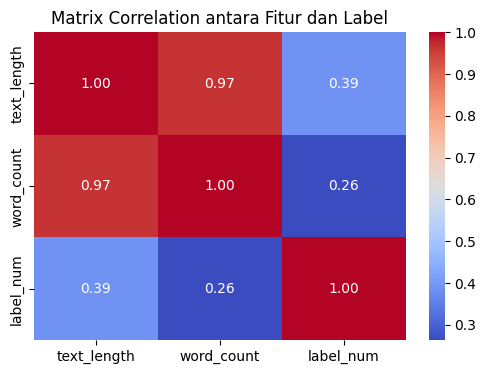

In [23]:
# MATRIK KORELASI
# Tambahkan fitur tambahan: jumlah kata
df['word_count'] = df['tokens'].apply(len)

# Konversi label ke angka: spam=1, ham=0
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Pilih kolom numerik untuk korelasi
corr_matrix = df[['text_length', 'word_count', 'label_num']].corr()

print("Matriks Korelasi:")
print(corr_matrix)

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrix Correlation antara Fitur dan Label')
plt.show()


                                                text label  polarity
0  Go until jurong point, crazy.. Available only ...   ham  0.150000
1                      Ok lar... Joking wif u oni...   ham  0.500000
2  Free entry in 2 a wkly comp to win FA Cup fina...  spam  0.300000
3  U dun say so early hor... U c already then say...   ham  0.100000
4  Nah I don't think he goes to usf, he lives aro...   ham  0.000000
5  FreeMsg Hey there darling it's been 3 week's n...  spam  0.308333
6  Even my brother is not like to speak with me. ...   ham  0.000000
7  As per your request 'Melle Melle (Oru Minnamin...   ham  0.000000
8  WINNER!! As a valued network customer you have...  spam  0.000000
9  Had your mobile 11 months or more? U R entitle...  spam  0.475000


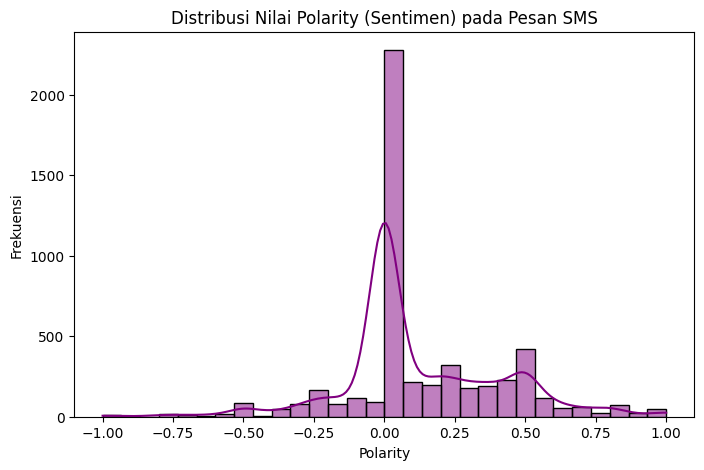

In [24]:
# LABELLING DATA
from textblob import TextBlob

# Hitung nilai polarity untuk setiap pesan
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Tampilkan contoh hasil
print(df[['text', 'label', 'polarity']].head(10))

# Visualisasi distribusi nilai polarity
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='polarity', bins=30, kde=True, color='purple')
plt.title('Distribusi Nilai Polarity (Sentimen) pada Pesan SMS')
plt.xlabel('Polarity')
plt.ylabel('Frekuensi')
plt.show()


In [25]:
# TEKS VEKTORISASI
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Fit dan transform data teks (gunakan kolom 'text' dari hasil preprocessing sebelumnya)
X = tfidf.fit_transform(df['text'])

# Konversi hasil TF-IDF ke DataFrame (opsional, biar bisa dilihat strukturnya)
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

print("Jumlah fitur TF-IDF:", len(tfidf.get_feature_names_out()))
print("Contoh fitur:\n", tfidf.get_feature_names_out()[:20])


Jumlah fitur TF-IDF: 3000
Contoh fitur:
 ['00' '000' '008704050406' '02' '0207' '02073162414' '021' '03' '04' '05'
 '050703' '0578' '06' '07' '07123456789' '07xxxxxxxxx' '0800'
 '08000839402' '08000930705' '08001950382']


In [26]:
print(tfidf_df.head())


    00  000  008704050406   02  0207  02073162414  021   03   04   05  ...  \
0  0.0  0.0           0.0  0.0   0.0          0.0  0.0  0.0  0.0  0.0  ...   
1  0.0  0.0           0.0  0.0   0.0          0.0  0.0  0.0  0.0  0.0  ...   
2  0.0  0.0           0.0  0.0   0.0          0.0  0.0  0.0  0.0  0.0  ...   
3  0.0  0.0           0.0  0.0   0.0          0.0  0.0  0.0  0.0  0.0  ...   
4  0.0  0.0           0.0  0.0   0.0          0.0  0.0  0.0  0.0  0.0  ...   

    yr  yrs  yummy  yun  yunny  yuo  yup  zed  zindgi  zoe  
0  0.0  0.0    0.0  0.0    0.0  0.0  0.0  0.0     0.0  0.0  
1  0.0  0.0    0.0  0.0    0.0  0.0  0.0  0.0     0.0  0.0  
2  0.0  0.0    0.0  0.0    0.0  0.0  0.0  0.0     0.0  0.0  
3  0.0  0.0    0.0  0.0    0.0  0.0  0.0  0.0     0.0  0.0  
4  0.0  0.0    0.0  0.0    0.0  0.0  0.0  0.0     0.0  0.0  

[5 rows x 3000 columns]


In [27]:
# DATA SPLITTING
from sklearn.model_selection import train_test_split

# Definisikan X dan y
X = tfidf_df  # hasil TF-IDF (fitur numerik)
y = df['label']  # target (spam/ham)

# Pisahkan data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])
print("\nDistribusi data latih:")
print(y_train.value_counts())
print("\nDistribusi data uji:")
print(y_test.value_counts())



Jumlah data latih: 4135
Jumlah data uji: 1034

Distribusi data latih:
label
ham     3613
spam     522
Name: count, dtype: int64

Distribusi data uji:
label
ham     903
spam    131
Name: count, dtype: int64


DATA MODELLING

In [38]:
# === CLASSIFICATION REPORT ===
from sklearn.metrics import classification_report

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_ml))



=== Classification Report ===
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       903
        spam       0.86      0.89      0.88       131

    accuracy                           0.97      1034
   macro avg       0.92      0.94      0.93      1034
weighted avg       0.97      0.97      0.97      1034



DATA EVALUASI

=== Confusion Matrix ===
[[884  19]
 [ 14 117]]


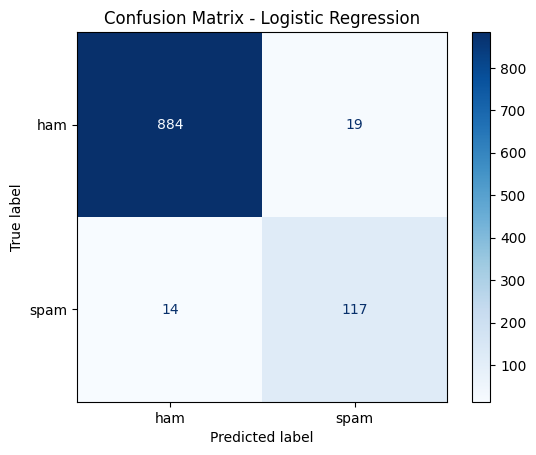

In [39]:
# === CONFUSION MATRIX ===
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_ml)
print("=== Confusion Matrix ===")
print(cm)

# Visualisasi Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_ml.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


Perbandingan Model apabila menggunakan beberapa algoritma


=== Perbandingan Akurasi Model ===
                    Model  Accuracy
0     Logistic Regression  0.968085
1             Naive Bayes  0.969052
2  Support Vector Machine  0.978723


C:\Users\Azam Jibran\AppData\Local\Temp\ipykernel_20796\3608329659.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_data, palette='cool')


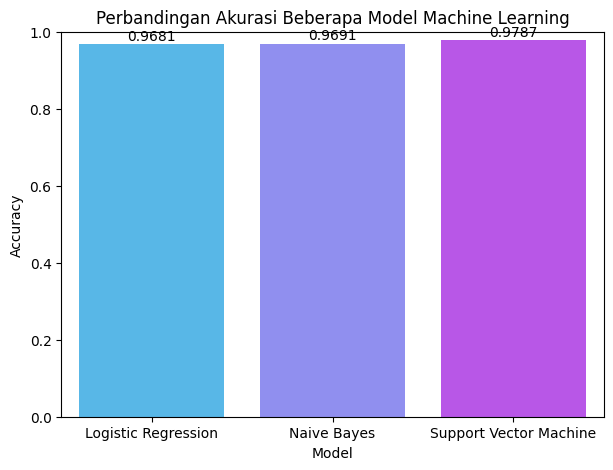

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Model 1: Logistic Regression ---
model_lr = LogisticRegression(max_iter=200, class_weight='balanced')
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# --- Model 2: Naive Bayes ---
model_nb = MultinomialNB()
model_nb.fit(x_train, y_train)
y_pred_nb = model_nb.predict(x_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

# --- Model 3: Support Vector Machine (SVM) ---
model_svm = LinearSVC()
model_svm.fit(x_train, y_train)
y_pred_svm = model_svm.predict(x_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

# --- Buat DataFrame hasil akurasi ---
import pandas as pd

accuracy_data = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Support Vector Machine'],
    'Accuracy': [acc_lr, acc_nb, acc_svm]
})

print("\n=== Perbandingan Akurasi Model ===")
print(accuracy_data)

# --- Visualisasi dengan Bar Chart ---
plt.figure(figsize=(7,5))
sns.barplot(x='Model', y='Accuracy', data=accuracy_data, palette='cool')
plt.title('Perbandingan Akurasi Beberapa Model Machine Learning')
plt.ylim(0,1)
for i, v in enumerate(accuracy_data['Accuracy']):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.show()
